Steps:
1. Importing Libraries and Data
2. Fit the model on Training Data (X_train, y_train)
3. Predict the output(y_predicted) from X_test
4. Compare between y_test and y_predicted
5. Predict y_predicted_train from X_train
6. Plotting the results

    Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# setting path variable as root
path = r'C:\Users\shrut\Downloads\Task_data_analytics\Exploratory_Project' 

In [4]:
# defining dataframe using already cleaned and prepared data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'US_Housing_Data_Cleaned.csv'))  

In [5]:
df.head()

,Unnamed: 0,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
2,3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260


Create scatterplot
Create numpy arrays corresponding to X and y variables

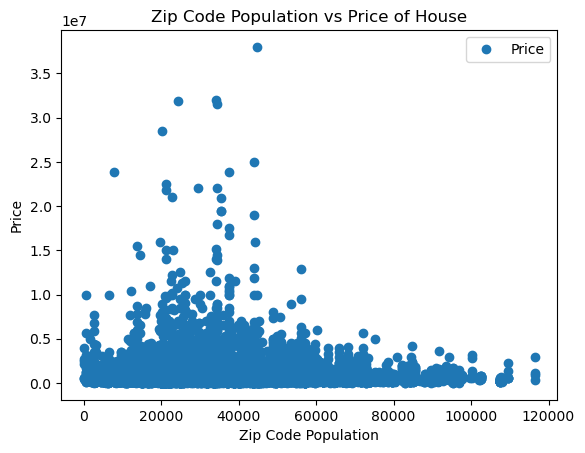

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Zip Code Population', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Zip Code Population vs Price of House')  
plt.xlabel('Zip Code Population')  
plt.ylabel('Price')  
plt.show()

# Hypothesis:

When the zipcode population is low or medium populated, there is a tendency for higher price than that of highly populated zipcode.

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Zip Code Population'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [9]:
X

array([[29563],
       [29815],
       [29815],
       ...,
       [22890],
       [22890],
       [22890]], dtype=int64)

In [10]:
y

array([[3999000.],
       [1650000.],
       [ 760000.],
       ...,
       [ 950000.],
       [ 425000.],
       [1150000.]])

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Regression Model Analysis

In [12]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [14]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

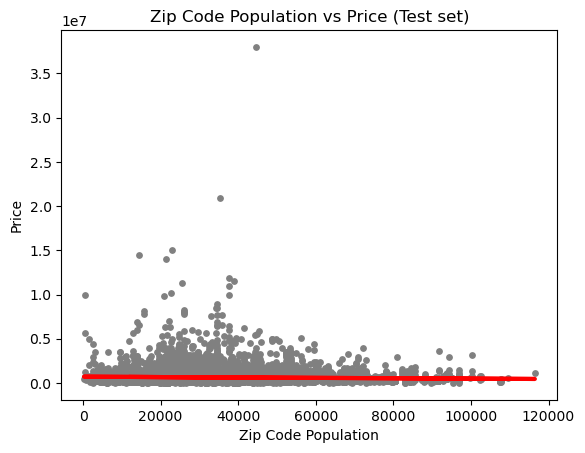

In [16]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Zip Code Population vs Price (Test set)')
plot_test.xlabel('Zip Code Population')
plot_test.ylabel('Price')
plot_test.show()

It is very well clear from the plot that the regression line does not fit correctly because our distribution does not seem to be linear.

Finding out the statistics between test and predicted outputs to confirm

In [17]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [18]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.21456856]]
Mean squared error:  739404842656.7964
R2 score:  0.0018874888013109548


Mean Squared Error is too large
R2 is too low indicating poor fit

In [19]:
y_predicted

array([[680475.28247288],
       [619240.24720756],
       [640012.90030469],
       ...,
       [641346.07057809],
       [625022.48571893],
       [612326.3641618 ]])

In [20]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,429000.0,680475.282473
1,49900.0,619240.247208
2,545086.0,640012.900305
3,399900.0,609002.296753
4,290000.0,640858.865495
5,204500.0,613858.845606
6,129900.0,626490.744675
7,1369000.0,574541.395383
8,459999.0,580387.856383
9,649900.0,639877.811623


The predicted y and acttual y_test values are very different 

Comparing how Regression fits on Training Set

In [21]:
# Predict output y (y_predicted_train) from X_train.

y_predicted_train = regression.predict(X_train) 

In [22]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [23]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.21456856]]
Mean squared error:  978623515308.6984
R2 score:  0.0017256545980049998


Again RMSE and R2 indicates a poor fit of the regression model

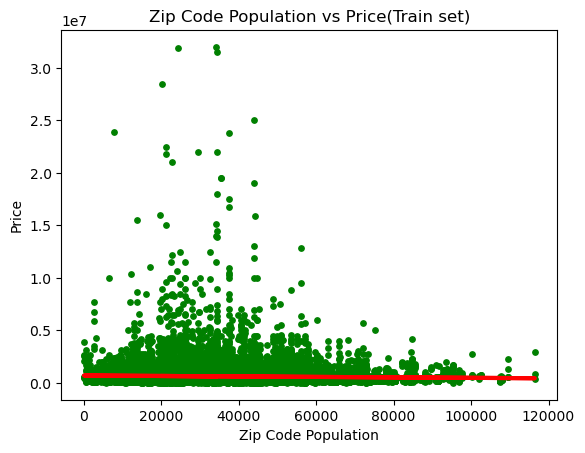

In [24]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Zip Code Population vs Price(Train set)')
plot_test.xlabel('Zip Code Population')
plot_test.ylabel('Price')
plot_test.show()

The model does not fit to the distribution and hence we cannot confirm on the hypothesis. Possibly there are more factors affecting the Price of House. Linear Regression model is a poor choice for prediction model.

In [ ]:
# Understanding any other linear relationship exists 

To understand about linear regression, trying to find out a relation between Zip Code Density and Price and also Median Household Income.

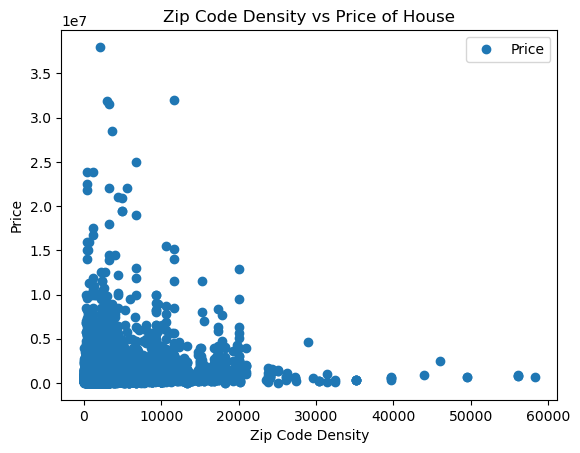

In [28]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Zip Code Density', y ='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Zip Code Density vs Price of House')  
plt.xlabel('Zip Code Density')  
plt.ylabel('Price')  
plt.show()

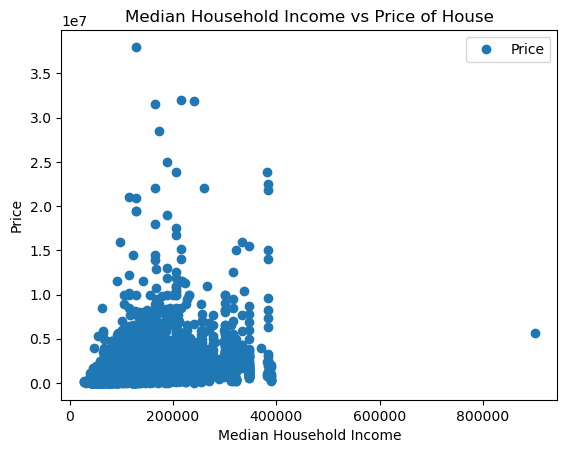

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Median Household Income', y ='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Median Household Income vs Price of House')  
plt.xlabel('Median Household Income')  
plt.ylabel('Price')  
plt.show()

Unfortunately they dont seem to have any linear relationship